# 全体

In [3]:
from sklearn.grid_search import GridSearchCV
tuned_parameters = {'n_estimators'  : [10, 100, 1000, 10000], 'max_features' : ['auto','sqrt','log2']}
data = np.loadtxt('FURUKAWA_全体_rank.csv', delimiter=',', dtype=float)
len(data[0])

86

In [4]:
train_feature = data[:,0:85]
train_label = data[:,-1]

grid = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5,scoring='r2') # モデルの評価関数の指定
grid.fit(train_feature,train_label)
print(grid.best_params_)

{'max_features': 'auto', 'n_estimators': 1000}


In [6]:
feature = data[:,0:85]
label = data[:,-1]

importance=np.zeros(85)
regr = RandomForestRegressor(n_estimators=1000,max_features='auto')
kf = KFold(n_splits = 5, shuffle = True)
for train_index, test_index in kf.split(feature):
    train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]
    regr.fit(train_feature,train_label)
    importance += regr.feature_importances_

In [7]:
rank_index = rank_backsort(importance)

In [9]:
rank_index

array([ 1.,  2.,  3.,  4.,  5., 20., 12.,  7., 13.,  9., 10., 11.,  6.,
       16., 15.,  8., 26., 14., 21., 18., 17., 33., 28., 19., 22., 30.,
       24., 23., 29., 27., 39., 31., 44., 45., 35., 48., 37., 46., 36.,
       32., 34., 41., 40., 51., 56., 38., 42., 55., 52., 53., 54., 65.,
       58., 49., 64., 60., 47., 66., 67., 25., 62., 43., 63., 69., 70.,
       78., 76., 50., 68., 57., 73., 61., 59., 75., 81., 79., 77., 71.,
       80., 74., 72., 82., 84., 85., 83.])

In [11]:
file=open("全体FURUKAWA_最後.csv","w")
data = np.loadtxt('FURUKAWA_全体_rank_名前.csv', delimiter=',', dtype=str)
feature=data[:,0:86]
label = data[:,-1]

for i in range(394):
    for j in range(1,86):
            for k in range(85):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

In [13]:
file=open("全体WANG_最後.csv","w")
data = np.loadtxt('WANG全体_名前付き.csv', delimiter=',', dtype=str)
feature=data[:,0:86]
label = data[:,-1]

for i in range(37):
    for j in range(1,86):
            for k in range(85):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

 # 残基毎

In [14]:
from sklearn.grid_search import GridSearchCV
tuned_parameters = {'n_estimators'  : [10, 100, 1000, 10000], 'max_features' : ['auto','sqrt','log2']}
data = np.loadtxt('FURUKAWA_残基毎_rank.csv', delimiter=',', dtype=float)
len(data[0])

65

In [15]:
train_feature = data[:,0:64]
train_label = data[:,-1]

grid = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5,scoring='r2') # モデルの評価関数の指定
grid.fit(train_feature,train_label)
print(grid.best_params_)

{'max_features': 'auto', 'n_estimators': 100}


In [16]:
feature = data[:,0:64]
label = data[:,-1]

importance=np.zeros(64)
regr = RandomForestRegressor(n_estimators=100,max_features='auto')
kf = KFold(n_splits = 5, shuffle = True)
for train_index, test_index in kf.split(feature):
    train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]
    regr.fit(train_feature,train_label)
    importance += regr.feature_importances_

In [17]:
rank_index = rank_backsort(importance)

In [20]:
rank_index

array([ 1.,  2.,  4.,  9.,  3., 18.,  8.,  5.,  7.,  6., 17., 12., 10.,
       31., 13., 11., 46., 39., 27., 15., 25., 22., 21., 38., 14., 45.,
       26., 29., 19., 34., 32., 43., 20., 24., 28., 33., 23., 41., 37.,
       36., 51., 40., 16., 44., 35., 42., 50., 47., 49., 30., 54., 62.,
       58., 55., 48., 53., 52., 57., 60., 61., 56., 59., 63., 64.])

In [18]:
file=open("残基毎FURUKAWA_最後.csv","w")
data = np.loadtxt('FURUKAWA_残基毎_rank_名前.csv', delimiter=',', dtype=str)
feature=data[:,0:65]
label = data[:,-1]

for i in range(394):
    for j in range(1,65):
            for k in range(64):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

In [19]:
file=open("残基毎WANG_最後.csv","w")
data = np.loadtxt('WANG残基毎_名前付き.csv', delimiter=',', dtype=str)
feature=data[:,0:65]
label = data[:,-1]

for i in range(37):
    for j in range(1,65):
            for k in range(64):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

In [21]:
data = np.loadtxt('FURUKAWA_残基毎_rank_名前.csv', delimiter=',', dtype=str)
feature=data[:,0:65]
feature[0][0]

'logS'

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
def pri(z):
    al=pd.read_csv("furukawa_全体206次元_名前付き.csv")
    sep=pd.read_csv("furukawa_残基毎_206次元_名前付き.csv")
    x=al[z]
    y=sep[z]
    plt.scatter(x,y)
    plt.xlabel(z)
    plt.ylabel(z)
    plt.show()
    plt.close()
    return

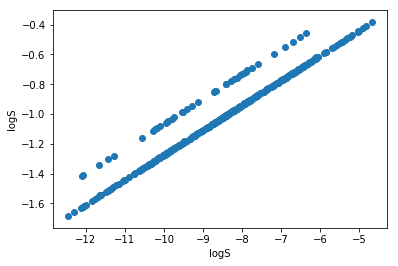

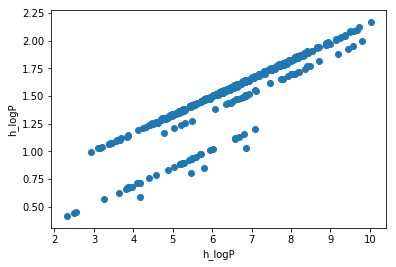

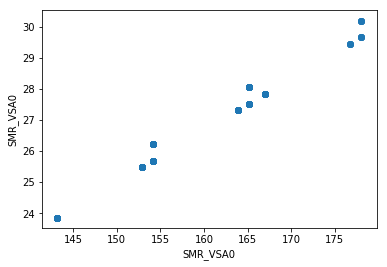

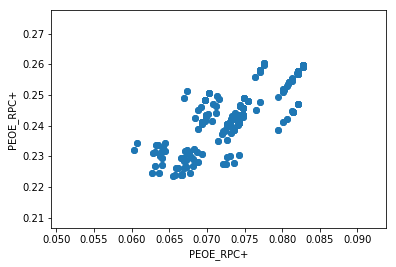

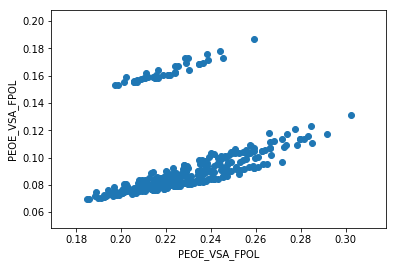

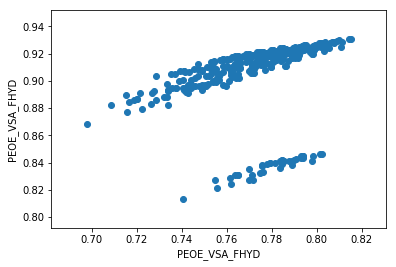

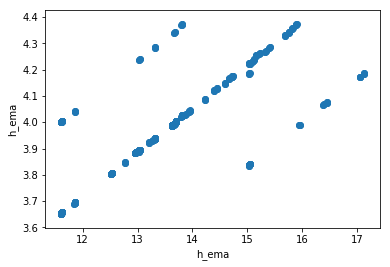

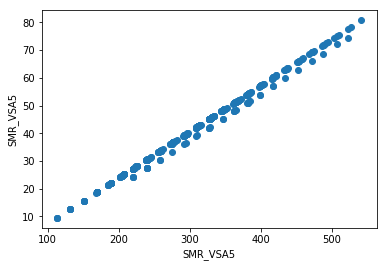

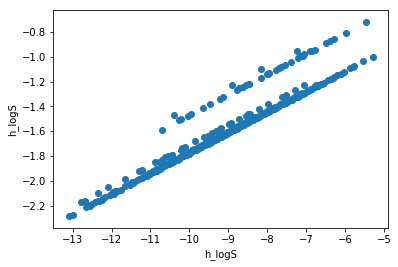

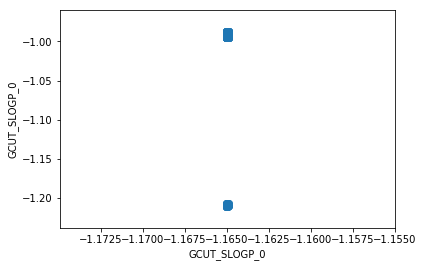

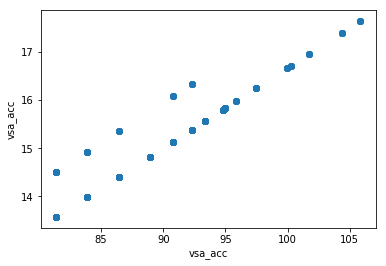

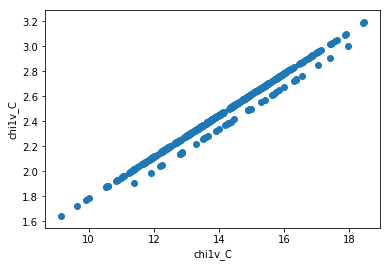

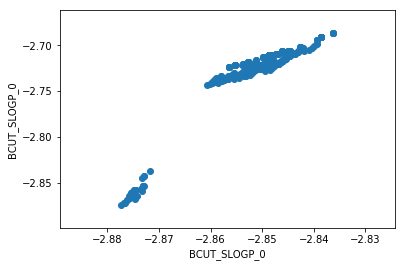

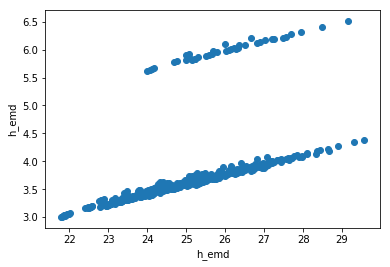

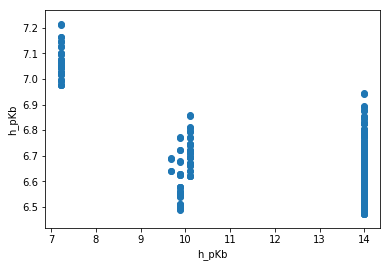

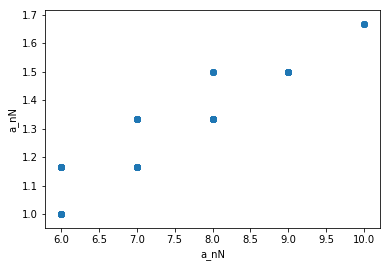

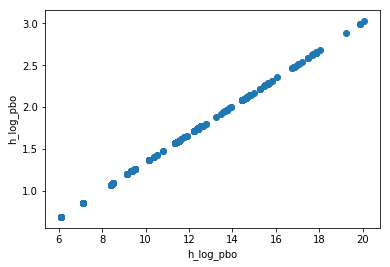

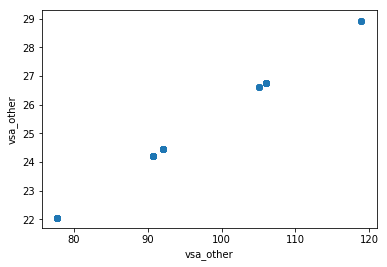

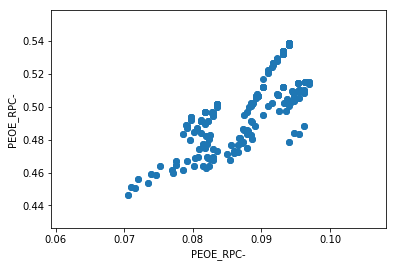

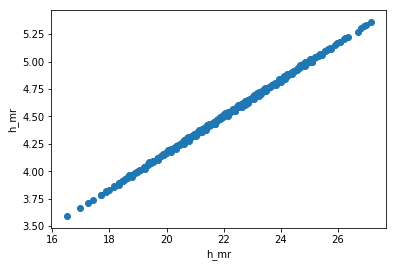

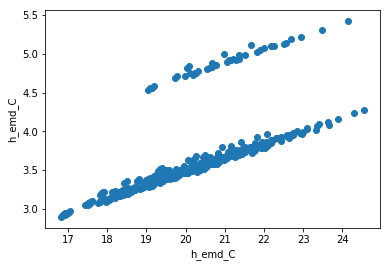

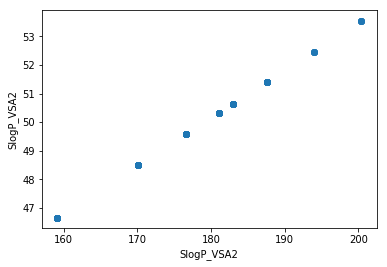

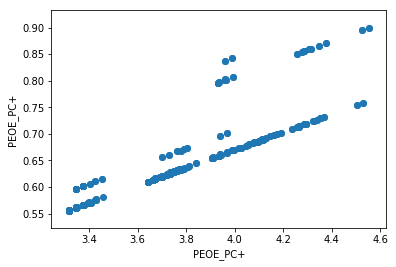

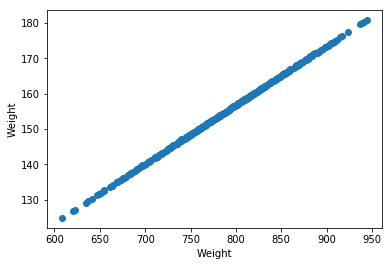

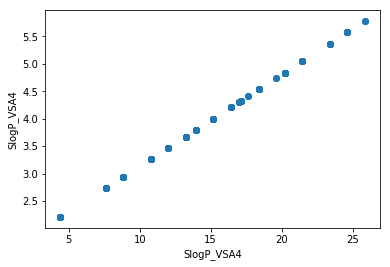

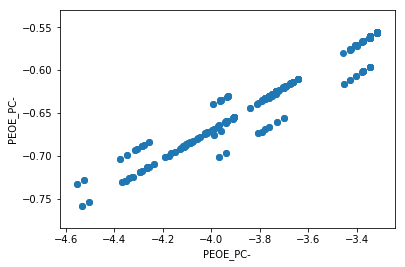

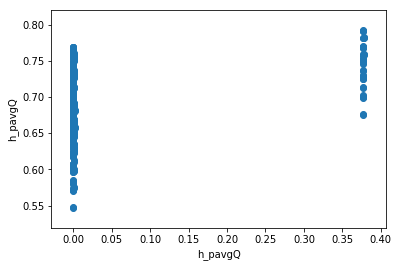

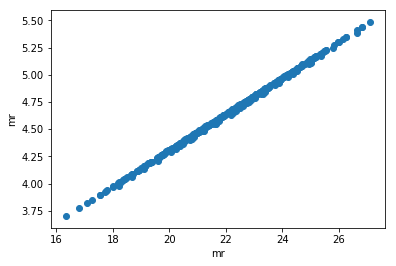

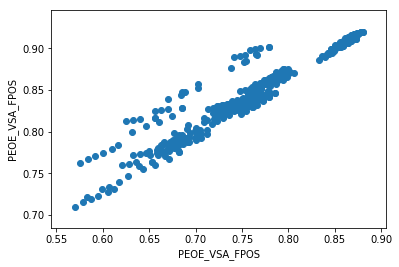

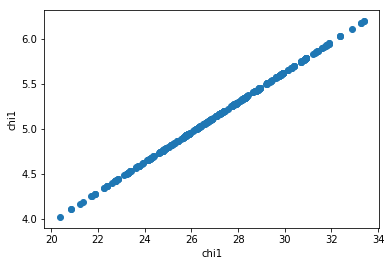

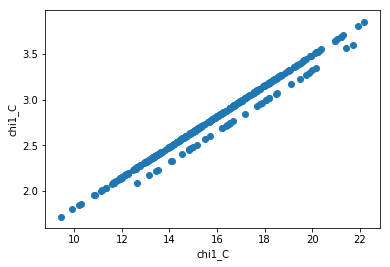

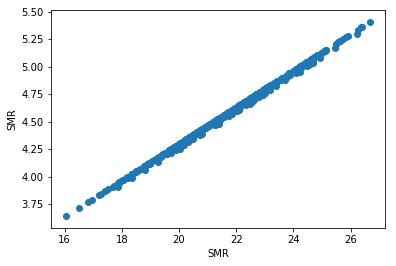

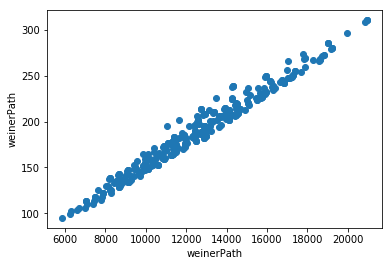

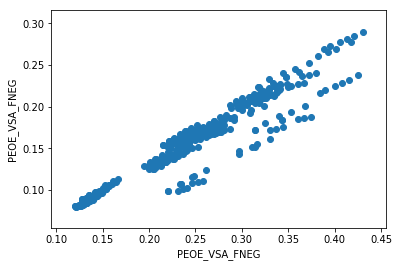

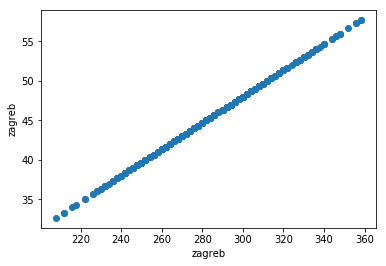

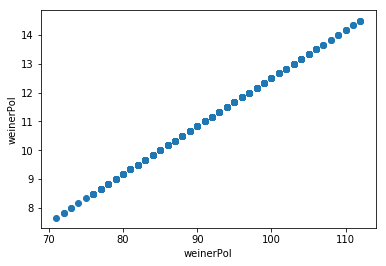

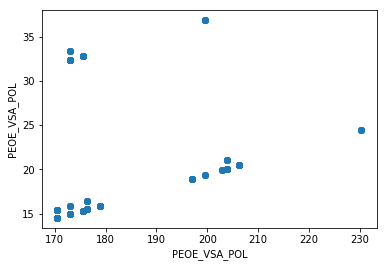

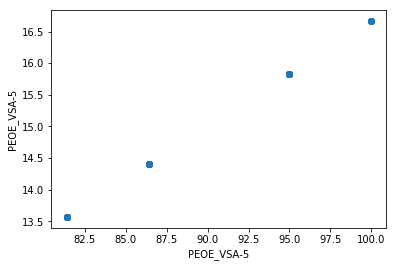

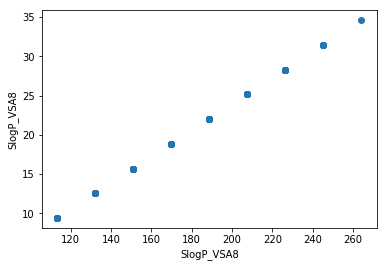

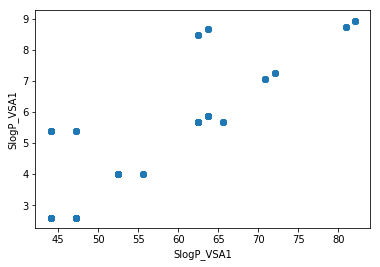

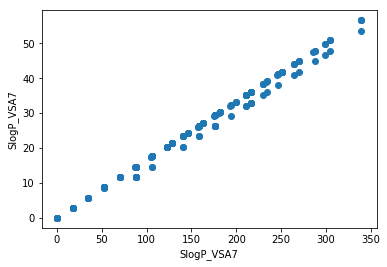

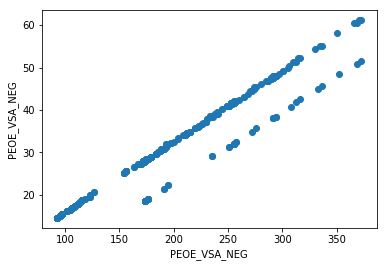

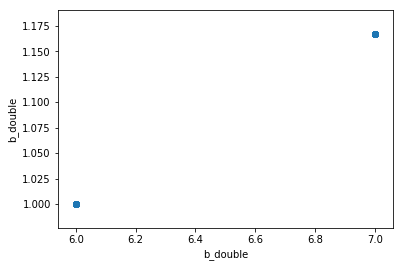

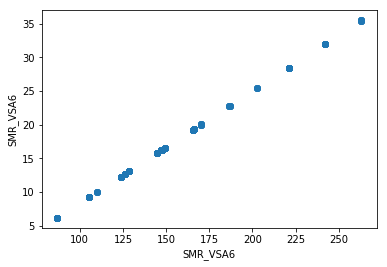

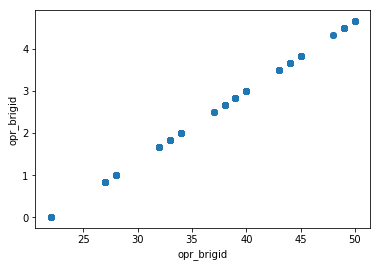

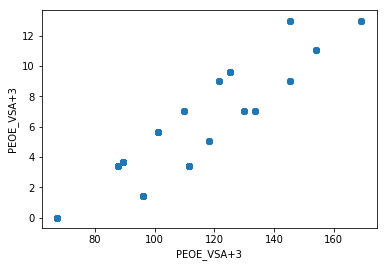

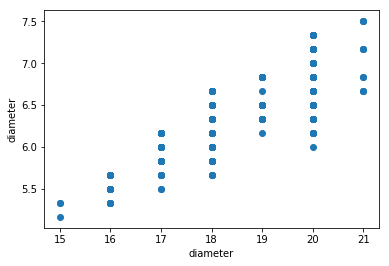

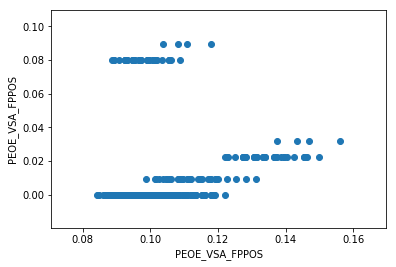

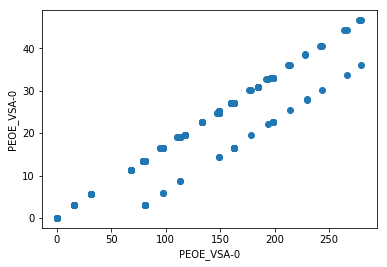

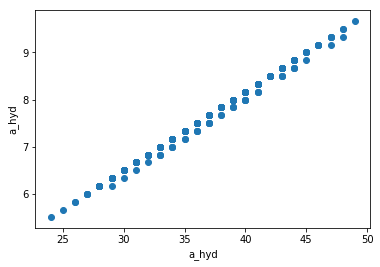

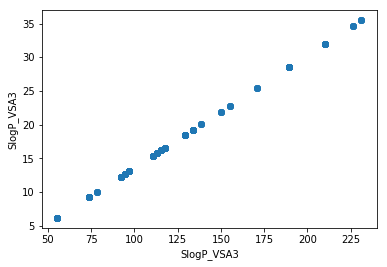

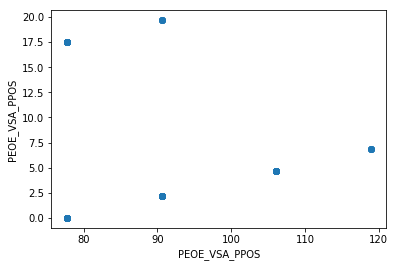

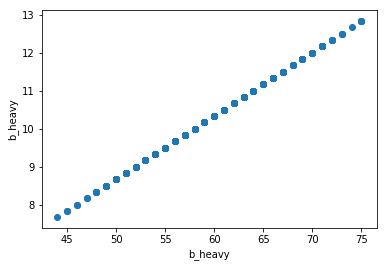

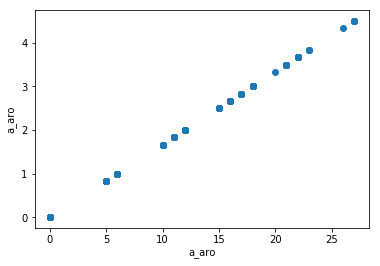

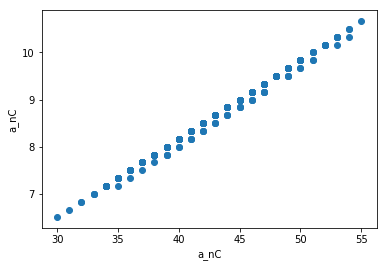

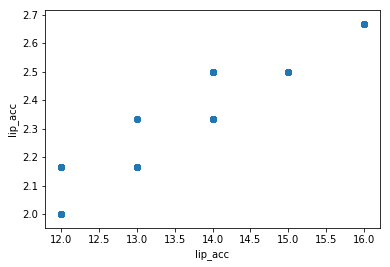

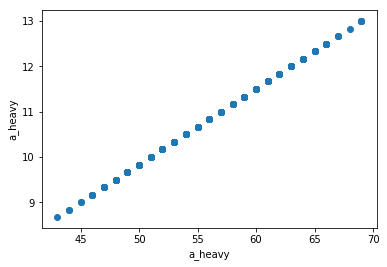

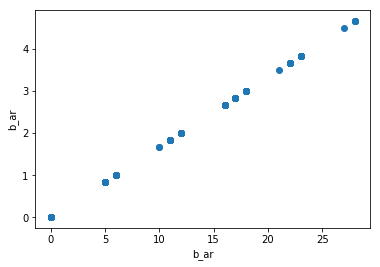

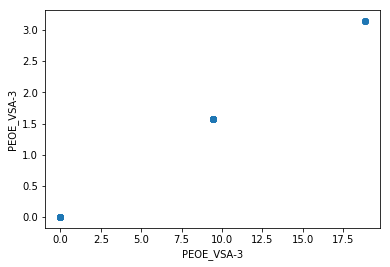

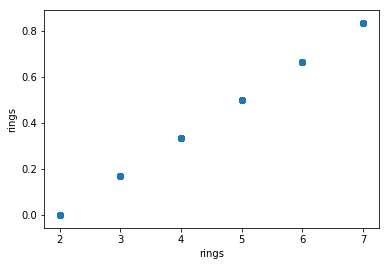

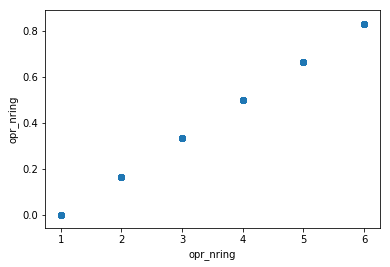

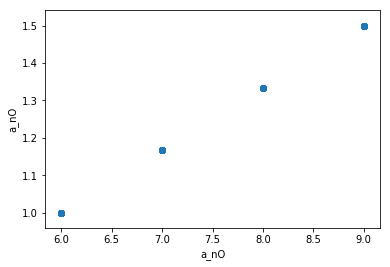

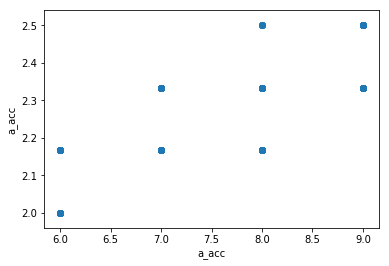

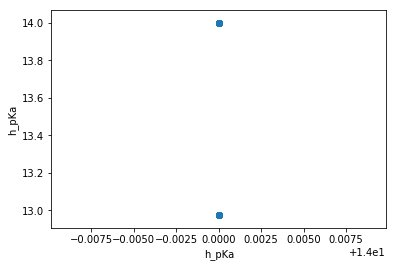

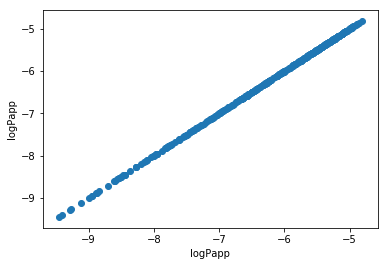

In [62]:
name=np.loadtxt("最後にしたい/残基毎FURUKAWA_最後.csv",delimiter=",",dtype=str)
name=name[0,:]

for i in range(len(name)):
    pri(name[i])